In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy
from tqdm import tqdm
import h5py

import calculation.MeanFieldv2 as MFv2
import calculation.CurrentMeirv2 as CsMv2
import calculation.SusceptibilitySimpv2 as Susceptv2
import settings.Constants as const

In [2]:
saddleFile = "h5_output_data/VT-space_lowV_V2.hdf5"
shotFile = "h5_output_data/CurrentNoiseVT_results_lowV_V2.hdf5"


##! Read data from the hdf5 file
with h5py.File(saddleFile, 'r') as f:
    domain = f['VTSpace/domain'][:]
    DRDataOne = f['VTSpace/DRDataOne'][:]
    DKDataOne = f['VTSpace/DKDataOne'][:]


with h5py.File(shotFile, 'r') as f:
    # retardedNonIntZero = f['ShotNoise/retardedNonIntZero'][:]/100
    # keldyshNonIntZero = f['ShotNoise/keldyshNonIntZero'][:]/100
    
    retardedNonIntOne = f['ShotNoise/retardedNonIntOne'][:]/100
    keldyshNonIntOne = f['ShotNoise/keldyshNonIntOne'][:]/100
    retardedIntOne = f['ShotNoise/retardedIntOne'][:]
    keldyshIntOne = f['ShotNoise/keldyshIntOne'][:]
    
    domainOne = f['ShotNoise/domainOne'][:]
    dominZero = f['ShotNoise/domainZero'][:]

In [3]:

retardedTotOne = retardedNonIntOne.real - 2*retardedIntOne.imag
keldyshTotOne = keldyshNonIntOne.real - keldyshIntOne.imag

In [4]:

# ###* Keldysh NonInt Case

# voltageSpace = domain[:,1]
# TvalueSpace = domain[:,-1]

# x = voltageSpace
# y = TvalueSpace
# z = keldyshNonIntZero[:, 0].real/100

# fig, ax = plt.subplots(figsize=(12, 8))
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', s=40)
# cbar = plt.colorbar(sc)
# cbar.set_label(r'$\Im S_0^K(\omega=0)$', fontsize=32)
# cbar.ax.tick_params(labelsize=32)


# plt.xlabel(r'$V/\Lambda$', fontsize=32)
# plt.ylabel(r'$T/\Lambda$', fontsize=32)
# ax.tick_params(axis='x', labelsize=32)
# ax.tick_params(axis='y', labelsize=32)

# plt.tight_layout()
# # plt.savefig('panelsCurrentNoise/ImSK_NonInt_VT.png', bbox_inches='tight', dpi=600)



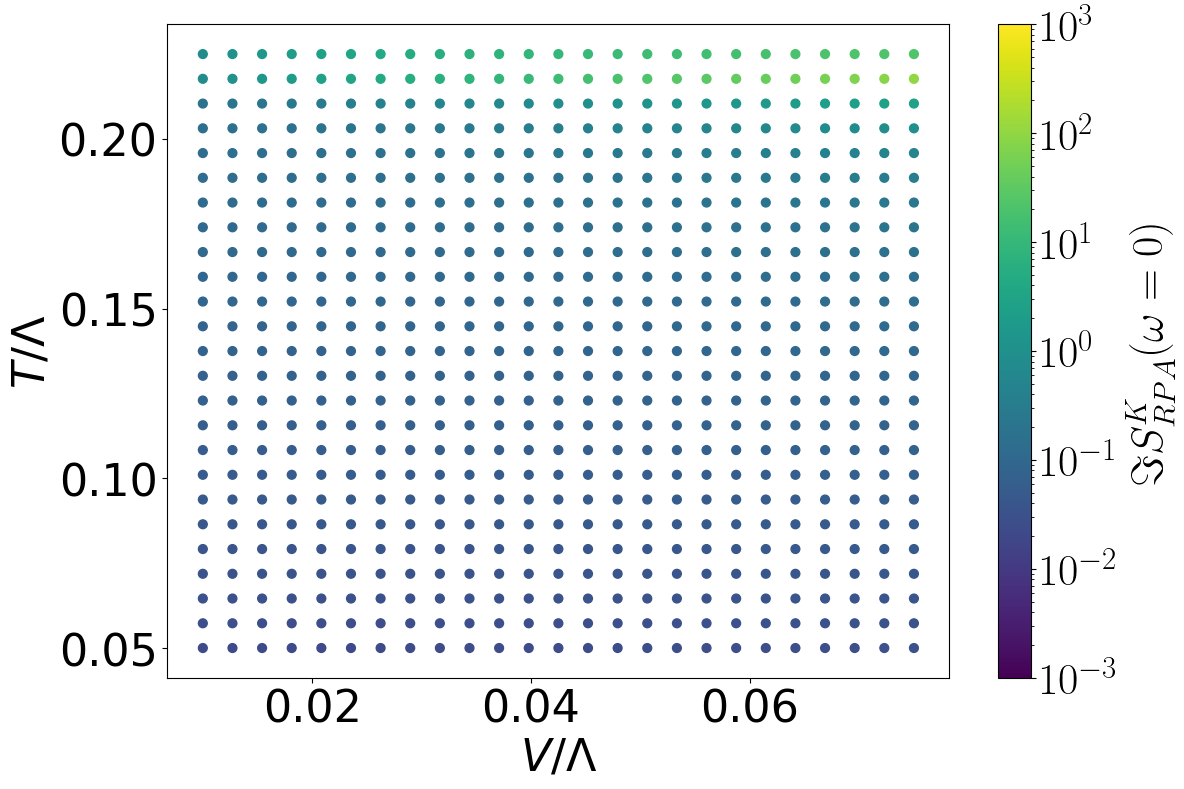

In [5]:

###* Keldysh RPA Case

voltageSpace = domain[:,1]
TvalueSpace = domain[:,-1]

x = voltageSpace
y = TvalueSpace
z = keldyshTotOne[:, 0]

vmin = 1e-3
vmax = 1e3

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\Im S_{RPA}^K(\omega=0)$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
# plt.savefig('panelsCurrentNoise/ImSK_RPA_VT.png', bbox_inches='tight', dpi=600)


In [6]:

# FauxPlusNonInt = retardedNonIntZero[:,1].real/keldyshNonIntZero[:,1].real
# FauxMinusNonInt = retardedNonIntZero[:,0].real/keldyshNonIntZero[:,0].real
# dFomegaNonInt = (FauxPlusNonInt - FauxMinusNonInt)/(2*2e-3)

FauxPlusTotal = retardedTotOne[:,1]/keldyshTotOne[:,1]
FauxMinusTotal = retardedTotOne[:,0]/keldyshTotOne[:,0]
dFomegaTotal = (FauxPlusTotal - FauxMinusTotal)/(2*2e-3)


slopRetarded = (retardedTotOne[:,1] - retardedTotOne[:,0])/(2*2e-3)


In [7]:
### check plots

# plt.plot(0.5/dFomegaTotal/2)
# plt.yscale('log')

# # plt.plot(dFomegaNonInt)
# TeffNonInt = 0.5/dFomegaNonInt/2
# TeffNonInt[TeffNonInt < 1e-5] = 0.0
# plt.plot(TeffNonInt)
# # plt.yscale('log')



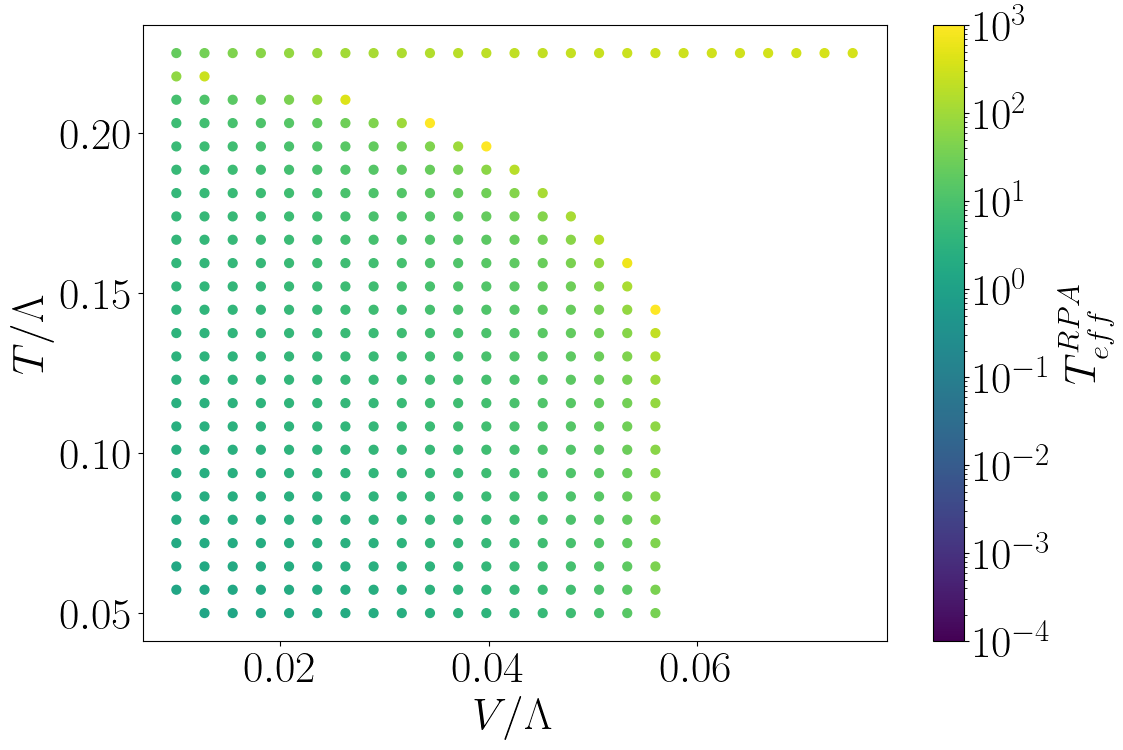

In [8]:

###* Keldysh RPA Case

voltageSpace = domain[1:,1]
TvalueSpace = domain[1:,-1]

# TeffRPA = np.abs(0.5/dFomegaTotal/2)
TeffRPA = 0.5/dFomegaTotal[1:]/2
# TeffRPA[TeffRPA < 1e-5] = np.nan

x = voltageSpace
y = TvalueSpace
z = TeffRPA

vmin = 1e-4
vmax = 1e3

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$T_{eff}^{RPA}$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

# plt.tight_layout()
# plt.savefig('panelsCurrentNoise/Teff_RPA_VT.png', bbox_inches='tight', dpi=600)


In [9]:
mask_neg = np.logical_and(TeffRPA < 0.0, voltageSpace < 0.2)

print(np.sum(mask_neg))

225


0.05604166666666667 0.21770833333333334


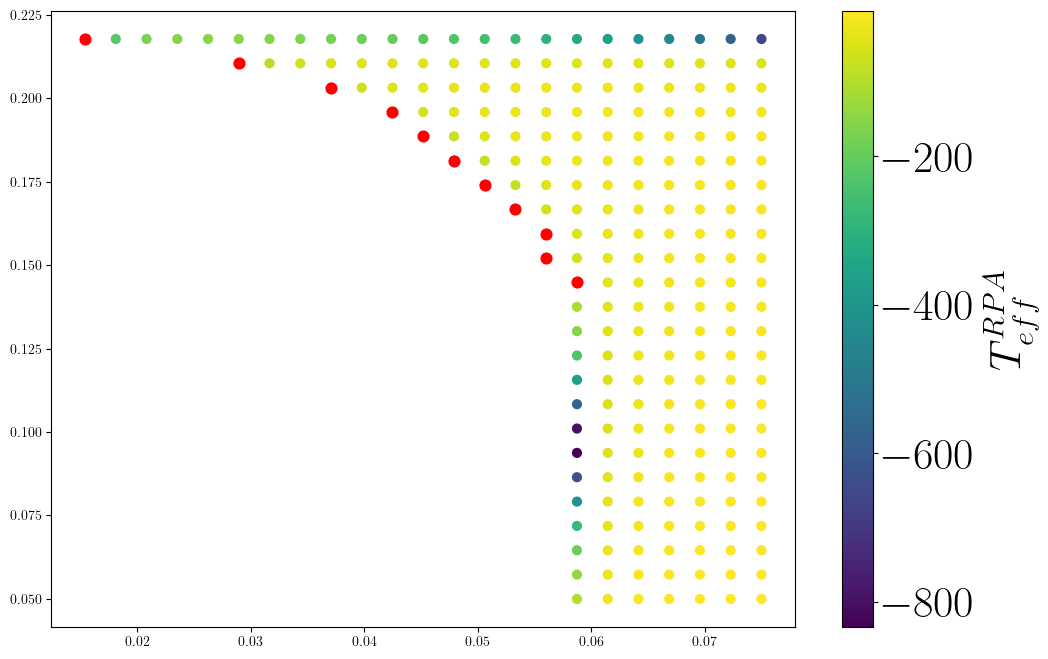

In [10]:
mask_neg = np.logical_and(TeffRPA < 0.0, voltageSpace < 0.2)

x = voltageSpace[mask_neg]
y = TvalueSpace[mask_neg]
z = TeffRPA[mask_neg]

vmin = 1e-4
vmax = 1e3

print(x[-8]/2, y[-8]/2)

# idx_flip = [-8, -7, -14, -20, -25, -30, -34]
# idx_flip = [-13, -7, -14, -20, -25, -30, -34]

idx_flip = [-23,-41,-56,-69,-81,-92,-102,-111,-119,-127,-134]

V_flip = x[idx_flip]
T_flip = y[idx_flip]
z_flip = z[idx_flip]


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = ax.scatter(x/2, y/2, c=z, cmap='viridis', s=40)
sc2= ax.scatter(V_flip/2, T_flip/2, color="red", s=60)
cbar = plt.colorbar(sc)
cbar.set_label(r'$T_{eff}^{RPA}$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


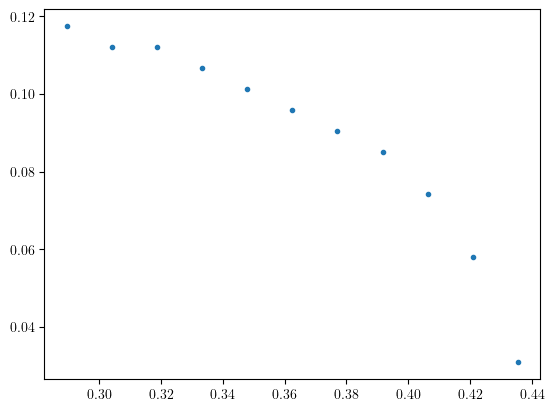

In [11]:
plt.plot(T_flip, V_flip, '.')

In [12]:


lambdaSamples = np.array([1.0])

phiConstantInit = 0.5
phiLambdaInit = 0.9
couplingValue = 0.7

def computeSaddlePoint(lambdaValue, Tvalue, voltageValue, pbar=None):
    result = scipy.optimize.root(MFv2.computeMFLambda, phiConstantInit, args=(lambdaValue, voltageValue, Tvalue, MFv2.Impy, couplingValue), method='lm', tol=1e-6)
    saddle_point = result.x[0]
    
    return saddle_point



In [13]:


hstep = 1e-5
omegaSpace = np.array([1e-5])

PiR = np.zeros((len(T_flip)), dtype=np.complex128)
PiK = np.zeros((len(T_flip)), dtype=np.complex128)

lambdaUpper = lambdaSamples[0]

pbar = tqdm(total=len(T_flip), desc='Computing PiR')


for i in range(len(T_flip)):
    Tvalue = T_flip[i]
    voltageValue = V_flip[i]
    phiValue = computeSaddlePoint(lambdaUpper, Tvalue, voltageValue)
    PiR[i:] = Susceptv2.computePiR(omegaSpace, lambdaUpper, phiValue, voltageValue, couplingValue, Tvalue=Tvalue)
    pbar.update(1)

pbar.close()


Computing PiR:   0%|          | 0/11 [00:00<?, ?it/s]

Computing PiR: 100%|██████████| 11/11 [00:00<00:00, 12.44it/s]


In [46]:
def computeXR(PiRdata, lambdaValue):
    den = 1.0 - PiRdata/(2.0*lambdaValue)
    return PiRdata*np.reciprocal(den)/(2.0*lambdaValue**2)


XR = computeXR(PiR, lambdaUpper)

print(XR.shape)
gap_suscept = np.reciprocal(XR).real

from scipy.stats import linregress
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(V_flip, gap_suscept)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

V_lin = np.linspace(np.min(V_flip), np.max(V_flip), 100)



(11,)
Slope: 39.71574595317189
Intercept: -5.996837929549262
R-squared: 0.9938134499117252


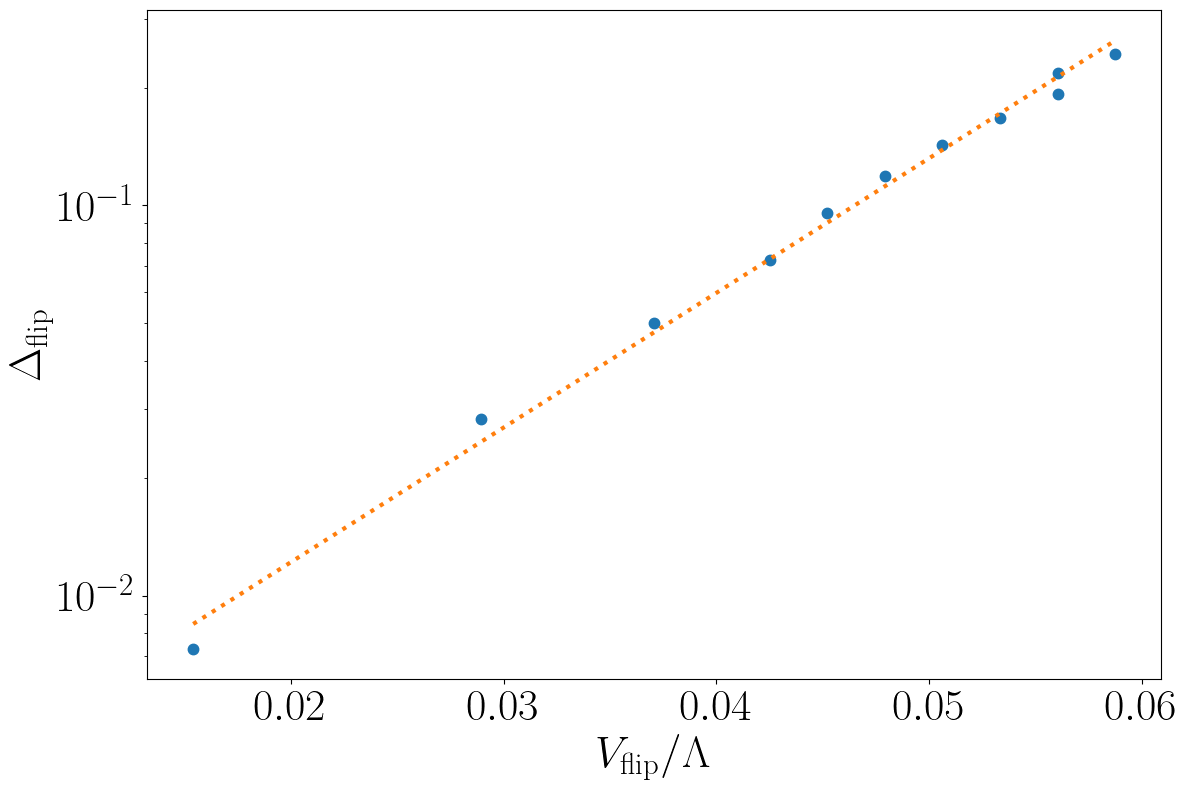

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
ax.plot(V_flip/2, gap_suscept, '.', markersize=15)
ax.plot(V_lin/2, np.e**(intercept + V_lin * slope), linestyle='dotted', linewidth=3)
plt.yscale('log')
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.xlabel(r"$V_{\rm flip}/\Lambda$", fontsize=32)
plt.ylabel(r"$\Delta_{\rm flip}$", fontsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/Gap_Vflip.png", bbox_inches='tight', dpi=600)

In [33]:
2/0.7

2.857142857142857

In [16]:
print(TeffRPA.shape)
print(voltageSpace.shape)

(624,)
(624,)


In [17]:
mask_neg = np.logical_and(TeffRPA < 0.0, voltageSpace < 0.15)
print(np.sum(mask_neg))

201


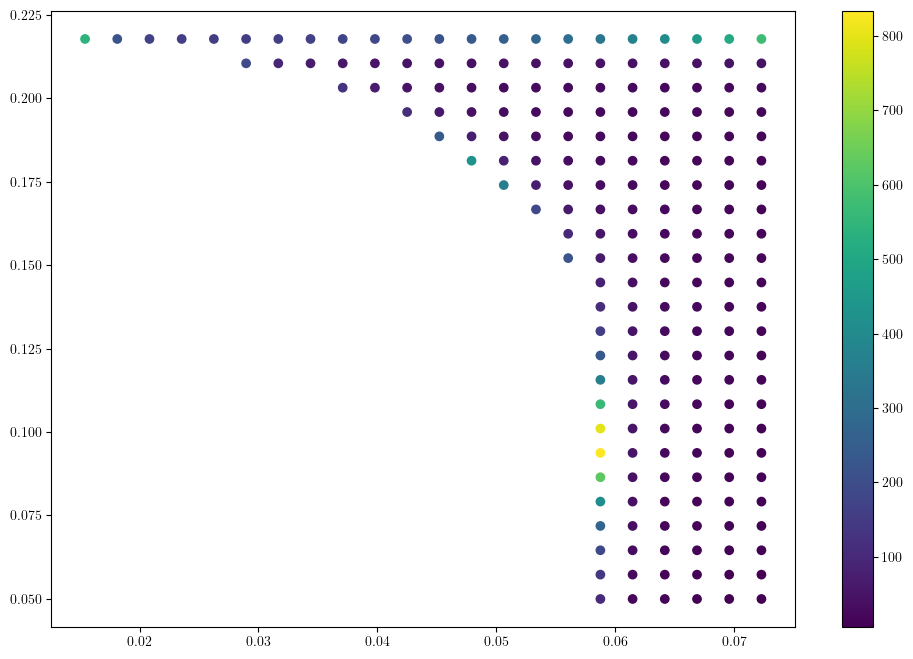

In [18]:
x = voltageSpace[mask_neg]
y = TvalueSpace[mask_neg]
z = np.abs(TeffRPA[mask_neg])


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z)
cbar = plt.colorbar(sc)

In [20]:

# maskCheck = np.logical_and(voltageSpace >0.4, voltageSpace < 0.45)
# x_mod1 = voltageSpace[maskCheck]
# y_mod1 = TvalueSpace[maskCheck]
# z_mod1 = TeffRPA[maskCheck]


# maskCheck = np.logical_and(voltageSpace >0.1, voltageSpace < 0.15)
# x_mod2 = voltageSpace[maskCheck]
# y_mod2 = TvalueSpace[maskCheck]
# z_mod2 = TeffRPA[maskCheck]


# fig, ax = plt.subplots(figsize=(12, 8))
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# plt.plot(y_mod1/2, -z_mod1, label=r"V=0.4")
# plt.plot(y_mod2/2, -z_mod2, label=r"V=0.1")
# plt.grid()
# plt.legend(fontsize=32)
# plt.xlabel(r'$T$', fontsize=32)
# plt.ylabel(r'$T_{eff}$', fontsize=32)
# ax.tick_params(axis='x', labelsize=32)
# ax.tick_params(axis='y', labelsize=32)
# plt.yscale('log')
# plt.tight_layout()
# plt.savefig("panelsCurrentNoise/perfil_T_log.png")

# fig, ax = plt.subplots(figsize=(12, 8))
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# plt.plot(y_mod1/2, -z_mod1, label=r"$V=0.4$")
# plt.plot(y_mod2/2, -z_mod2, label=r"$V=0.1$")
# plt.grid()
# plt.legend(fontsize=32)
# plt.xlabel(r'$T$', fontsize=32)
# plt.ylabel(r'$T_{eff}$', fontsize=32)
# ax.tick_params(axis='x', labelsize=32)
# ax.tick_params(axis='y', labelsize=32)
# plt.tight_layout()
# plt.savefig("panelsCurrentNoise/perfil_T.png")